# Подключаем модули и скачиваем данные

In [ ]:
import os
import random
import numpy as np
import pandas as pd
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import random_split
from torch.utils.data.dataloader import DataLoader

from torchvision import datasets, transforms, models 
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid

In [ ]:
data_dir = '../input/furniture-images-dataset/furniture_images'

In [ ]:
labels=pd.read_csv('../input/furniture-images-dataset/furniture_data_img.csv')
labels

,Label,Furniture_Type,Image_File
0,furniture set,Other,/furniture_images/1634011558853_Furniture Set ...
1,bed room set,Bed / bedroom item,/furniture_images/1634011559093_Bed Room Set f...
2,6by6 teak box bed with hybrids mattress,Bed / bedroom item,/furniture_images/1634011559259_6by6 Teak Box ...
3,new spring mattress,Bed / bedroom item,/furniture_images/1634011559590_New Spring Mat...
4,exclusive 6 by teak box bed with spring mattress,Bed / bedroom item,/furniture_images/1634011559751_Exclusive 6 by...
...,...,...,...
9341,library cupboard,Storage,/furniture_images/1634028757107_Library Cupboa...
9342,piyestra cupboard,Storage,/furniture_images/1634028757269_Piyestra Cupbo...
9343,dark 3d wardrobe,Bed / bedroom item,/furniture_images/1634028757678_Dark 3d wardro...
9344,3 door cupboard,Bed / bedroom item,/furniture_images/1634028757990_3 Door cupboar...


In [ ]:
Name = labels['Furniture_Type'].unique().tolist()
print(Name)
print(len(Name))

['Other', 'Bed / bedroom item', 'TV / stereo', 'Storage', 'Table / chair', 'Sofa / living room item', 'Antique / art', 'Lighting', 'Textiles / decoration']
9


In [ ]:
N=list(range(len(Name)))    
normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

In [ ]:
labels['label']=labels['Furniture_Type'].map(normal_mapping)

In [ ]:
files = labels['Image_File'].unique().tolist()
print(files[0:10])
print(len(files))

['/furniture_images/1634011558853_Furniture Set for sale.jpg', '/furniture_images/1634011559093_Bed Room Set for sale.jpg', '/furniture_images/1634011559259_6by6 Teak Box Bed with Hybrids Mattress for sale.jpg', '/furniture_images/1634011559590_New Spring Mattress for sale.jpg', '/furniture_images/1634011559751_Exclusive 6 by Teak Box Bed with Spring Mattress for sale.jpg', '/furniture_images/1634011559907_Tv Stand for sale.jpg', '/furniture_images/1634011560082_Exclusive 6 by 5 Teak Box Bed with Spring Mattress for sale.jpg', '/furniture_images/1634011560266_New Phoenix 6 Pc Drawer Set for sale.jpg', '/furniture_images/1634011560797_Exclusive 6 by Teak Box Bed for sale.jpg', '/furniture_images/1634011561104_Tv Stand for sale.jpg']
9346


In [ ]:
dataset=[]
for i in tqdm(range(len(labels))):
    labeli=labels.loc[i,'label']
    filei=labels.loc[i,'Image_File']
    path=os.path.join(data_dir,filei[1:])
    img1=cv2.imread(path)
    img2=cv2.resize(img1,dsize=(100,100),interpolation=cv2.INTER_CUBIC)
    img3=img2.astype(np.float32)
    image=torch.from_numpy(img3)
    dataset+=[[image,labeli]]

100%|██████████| 9346/9346 [00:57<00:00, 163.71it/s]


In [ ]:
dataset[100]

[tensor([[[255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.],
          ...,
          [255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.]],
 
         [[255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.],
          ...,
          [255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.]],
 
         [[255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.],
          ...,
          [255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.]],
 
         ...,
 
         [[255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.],
          ...,
          [255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.]],
 
         [[255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.],
          ...,
          [255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.

In [ ]:
# view one image shape of the dataset.
img, label = dataset[100]
print(img.shape)
print(label)

torch.Size([100, 100, 3])
5


In [ ]:
def show_image(img,label):
    plt.imshow(img.numpy().astype(int))

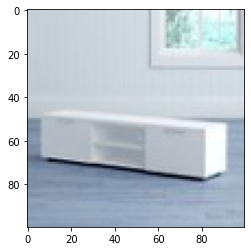

In [ ]:
show_image(*dataset[20])

In [ ]:
torch.manual_seed(20)
val_size = len(dataset)//10
test_size = len(dataset)//5
train_size = len(dataset) - val_size - test_size

In [ ]:
train_ds, val_ds, test_ds = random_split(dataset, [train_size, val_size, test_size])
len(train_ds), len(val_ds), len(test_ds)   

(6543, 934, 1869)

In [ ]:
batch_size = 64
train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_ds, batch_size, num_workers=4, pin_memory=True)

In [ ]:
m=len(dataset)
M=list(range(m))
random.seed(2021)
random.shuffle(M)

# Примеры распознавания

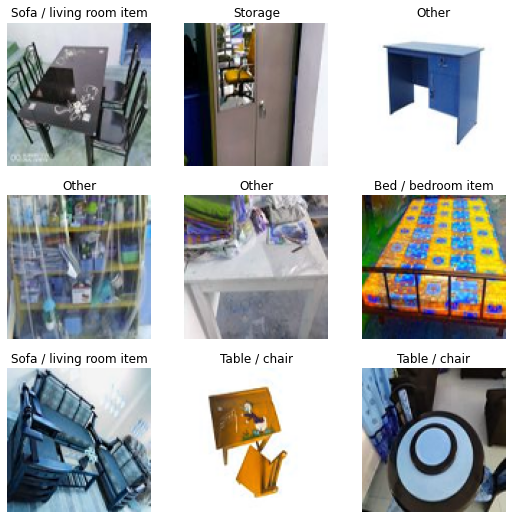

In [ ]:
fig, axs = plt.subplots(3,3,figsize=(9,9))
for i in range(9):
    r=i//3
    c=i%3
    img1,label=dataset[M[i]]
    ax=axs[r][c].axis("off")
    ax=axs[r][c].set_title(reverse_mapping[label])
    ax=axs[r][c].imshow(img1.numpy().astype(int))
plt.show()

# Метод ближайних соседей с функцией обучения

In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

In [ ]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)


def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in tqdm(train_loader):
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
torch.cuda.is_available()

False

In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
device = get_default_device()
device

device(type='cpu')

In [ ]:
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)
test_loader = DeviceDataLoader(test_loader, device)

In [ ]:
input_size = 3*100*100
output_size = len(Name)

# Модель классификации

In [ ]:
class Model(ImageClassificationBase):
    def __init__(self, input_size, output_size):
        super().__init__()
        # hidden layer
        self.in_layer = nn.Linear(input_size, 8384)
        self.hidden1 = nn.Linear(8384, 4192)
        self.hidden2 = nn.Linear(4192, 2096)
        self.hidden3 = nn.Linear(2096, 1048)
        self.out_layer = nn.Linear(1048, output_size)
        
    def forward(self, xb):
        # Flatten images into vectors
        out = xb.view(xb.size(0), -1)
        out = self.in_layer(out)
        out = self.hidden1(F.relu(out))
        out = self.hidden2(F.relu(out))
        out = self.hidden3(F.relu(out))
        out = self.out_layer(F.relu(out))
        return out

In [ ]:
model = to_device(Model(input_size, output_size), device)

In [ ]:
model

Model(
  (in_layer): Linear(in_features=30000, out_features=8384, bias=True)
  (hidden1): Linear(in_features=8384, out_features=4192, bias=True)
  (hidden2): Linear(in_features=4192, out_features=2096, bias=True)
  (hidden3): Linear(in_features=2096, out_features=1048, bias=True)
  (out_layer): Linear(in_features=1048, out_features=9, bias=True)
)

In [ ]:
history = [evaluate(model, val_loader)]
history

[{'val_loss': 4.852341651916504, 'val_acc': 0.16891448199748993}]

In [ ]:
history += fit(8, 0.01, model, train_loader, val_loader)

100%|██████████| 103/103 [02:20<00:00,  1.36s/it]


Epoch [0], train_loss: nan, val_loss: nan, val_acc: 0.0313


100%|██████████| 103/103 [02:22<00:00,  1.39s/it]


Epoch [1], train_loss: nan, val_loss: nan, val_acc: 0.0313


100%|██████████| 103/103 [02:24<00:00,  1.40s/it]


Epoch [2], train_loss: nan, val_loss: nan, val_acc: 0.0313


100%|██████████| 103/103 [02:22<00:00,  1.39s/it]


Epoch [3], train_loss: nan, val_loss: nan, val_acc: 0.0313


100%|██████████| 103/103 [02:25<00:00,  1.41s/it]


Epoch [4], train_loss: nan, val_loss: nan, val_acc: 0.0313


100%|██████████| 103/103 [02:25<00:00,  1.41s/it]


Epoch [5], train_loss: nan, val_loss: nan, val_acc: 0.0313


100%|██████████| 103/103 [02:36<00:00,  1.52s/it]


Epoch [6], train_loss: nan, val_loss: nan, val_acc: 0.0313


100%|██████████| 103/103 [02:27<00:00,  1.43s/it]


Epoch [7], train_loss: nan, val_loss: nan, val_acc: 0.0313


In [ ]:
history += fit(8, 0.001, model, train_loader, val_loader)

100%|██████████| 103/103 [02:23<00:00,  1.39s/it]


Epoch [0], train_loss: nan, val_loss: nan, val_acc: 0.0313


100%|██████████| 103/103 [02:25<00:00,  1.41s/it]


Epoch [1], train_loss: nan, val_loss: nan, val_acc: 0.0313


100%|██████████| 103/103 [02:31<00:00,  1.47s/it]


Epoch [2], train_loss: nan, val_loss: nan, val_acc: 0.0313


100%|██████████| 103/103 [02:26<00:00,  1.43s/it]


Epoch [3], train_loss: nan, val_loss: nan, val_acc: 0.0313


100%|██████████| 103/103 [02:26<00:00,  1.43s/it]


Epoch [4], train_loss: nan, val_loss: nan, val_acc: 0.0313


100%|██████████| 103/103 [02:37<00:00,  1.53s/it]


Epoch [5], train_loss: nan, val_loss: nan, val_acc: 0.0313


100%|██████████| 103/103 [02:29<00:00,  1.45s/it]


Epoch [6], train_loss: nan, val_loss: nan, val_acc: 0.0313


100%|██████████| 103/103 [02:29<00:00,  1.46s/it]


Epoch [7], train_loss: nan, val_loss: nan, val_acc: 0.0313


In [ ]:
history += fit(4, 0.0001, model, train_loader, val_loader)

100%|██████████| 103/103 [02:34<00:00,  1.50s/it]


Epoch [0], train_loss: nan, val_loss: nan, val_acc: 0.0313


100%|██████████| 103/103 [02:47<00:00,  1.63s/it]


Epoch [1], train_loss: nan, val_loss: nan, val_acc: 0.0313


100%|██████████| 103/103 [02:29<00:00,  1.45s/it]


Epoch [2], train_loss: nan, val_loss: nan, val_acc: 0.0313


100%|██████████| 103/103 [02:27<00:00,  1.44s/it]


Epoch [3], train_loss: nan, val_loss: nan, val_acc: 0.0313


In [ ]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs')
    plt.show()
    
    
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs')
    plt.show()

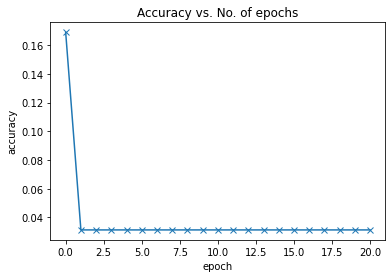

In [ ]:
plot_accuracies(history)

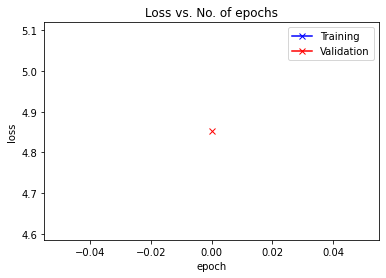

In [ ]:
plot_losses(history)

In [ ]:
evaluate(model, test_loader)

{'val_loss': nan, 'val_acc': 0.02760416641831398}